### Momentum 

Momentum helps us in not taking the direction that does not lead us to convergence. In momentum, variable velocity 'v' and momentum 'β' is introduced. 'β' is called momentum and usually assigned a value of 0.9. 'v' is initialised to zero and in subsequent iterations it is calculated using the formula.


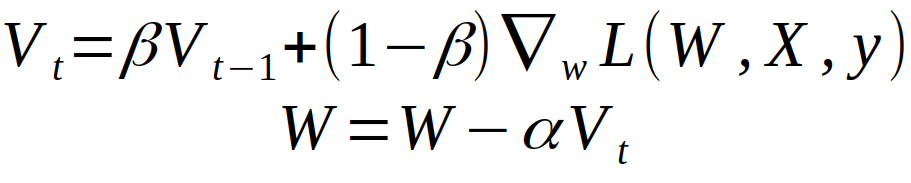

If the learning rate is scaled by (1 - β), the above equation can be written as

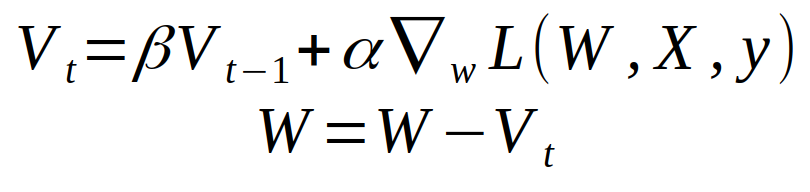

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# set seed for reproducibilty
np.random.seed(1) 
num_samples = 100
X = np.random.uniform(-1.,1.,num_samples)
m = 2.5
b = 1
y = m*X +b # y = 2.5X + 1 

In [3]:
X[20:40]

array([ 0.60148914,  0.93652315, -0.37315164,  0.38464523,  0.7527783 ,
        0.78921333, -0.82991158, -0.92189043, -0.66033916,  0.75628501,
       -0.80330633, -0.15778475,  0.91577906,  0.06633057,  0.38375423,
       -0.36896874,  0.37300186,  0.66925134, -0.96342345,  0.50028863])

In [4]:
y

array([ 0.58511002,  2.10162247, -1.49942813,  0.01166286, -0.76622055,
       -1.03830703, -0.56869894,  0.22780364,  0.48383737,  1.19408367,
        0.59597257,  1.9260975 , -0.47773875,  2.89058718, -1.36306203,
        1.85233755,  0.58652401,  1.29344914, -0.79806531, -0.50949255,
        2.50372284,  3.34130788,  0.06712089,  1.96161308,  2.88194576,
        2.97303332, -1.07477894, -1.30472608, -0.6508479 ,  2.89071252,
       -1.00826583,  0.60553813,  3.28944765,  1.16582642,  1.95938557,
        0.07757816,  1.93250464,  2.67312836, -1.40855861,  2.25072157,
        3.44430544,  2.24082827, -0.09778004,  2.44639664, -0.98386997,
        0.73946763,  3.04297752, -0.03192926, -0.06112331, -0.84985714,
       -1.40316521,  1.89417766, -0.44185942, -0.1722667 ,  0.9578658 ,
       -1.23318727,  1.37058803, -0.76635713,  1.44652768,  1.9987918 ,
       -0.98832786,  0.57027994,  1.97200079,  0.57089635, -1.25023271,
        1.17948203,  1.81897323,  1.07444556,  3.22297378,  1.43

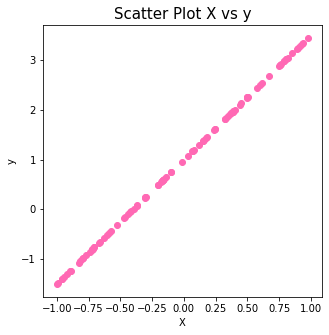

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X,y,color = 'hotpink')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot X vs y",fontsize=15)
plt.show()

Let us see the implementation of Momentum in minibatch SGD. 
Note : Mini batch gradient descent where the data is shuffled randomly and then a mini-batch of data is selected is also called as mini-batch SGD.

In [6]:
def minibatchsgd_momentum(X, y, lr, epochs, batch_size, momentum):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    v_m = 0
    v_b = 0
    for epoch in range(epochs):
        total_len = len(X)
        for i in range(0, total_len, batch_size):
            Xs = X[i:i+batch_size]
            ys = y[i:i+batch_size]            
            N = len(Xs)
            f = ys - (m*Xs + b)
   
            v_m = (lr * (-2 * Xs.dot(f).sum() / N)) + (momentum * v_m)
            v_b = (lr * (-2 * f.sum() / N)) + (momentum*v_b)
            m = m - v_m
            b = b - v_b
            log.append((m, b))
            mse.append(mean_squared_error(y, (m*X + b)))        
    return m, b, log, mse

In [7]:
momentum = 0.9
lr = 0.05 * (1 - momentum)
epochs = 20
batch_size = 10
m,b,log,mse = minibatchsgd_momentum(X, y, lr, epochs, batch_size, momentum)

In [8]:
print(m)
print(b)
# print(log)
#print(mse)


2.499982141031187
1.0000022781248525


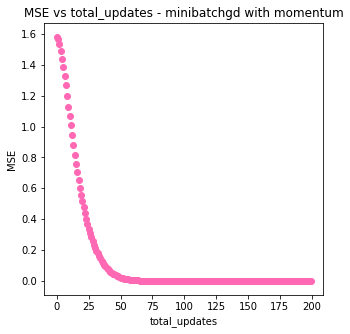

In [9]:
total_updates = int(epochs*(len(X)/batch_size))
epochs = range(total_updates)
plt.figure(figsize=(5,5))
plt.title("MSE vs total_updates - minibatchgd with momentum")
plt.xlabel("total_updates")
plt.ylabel("MSE")
plt.scatter(epochs, mse, color = 'hotpink')
plt.show()

### Nesterov Accelerated gradient: 

In Nesterov momentum, instead of calculating the gradients for the parameters W, we calculate the gradients for ( W - β *  V <sub>t-1 )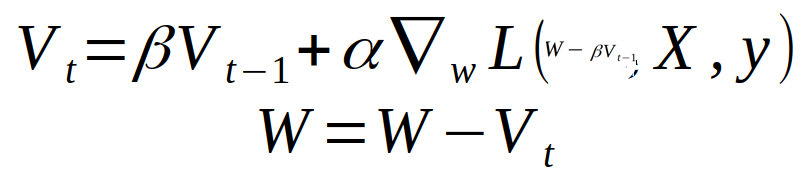

In [10]:
def minibatchsgd_nesterovmomentum(X, y, lr, epochs, batch_size, momentum):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    v_m = 0
    v_b = 0
    for epoch in range(epochs):
        total_len = len(X)
        for i in range(0, total_len, batch_size):
            Xs = X[i:i+batch_size]
            ys = y[i:i+batch_size]            
            N = len(Xs)
        
            m = m - (momentum * v_m)
            b = b - (momentum * v_b)
            # Gradients are calculated for 
            f = ys - (m*Xs +b)
            v_m = (lr * (-2 * Xs.dot(f).sum() / N)) + (momentum * v_m)
            v_b = (lr * (-2 * f.sum() / N)) + (momentum*v_b)
            m = m - v_m
            b = b - v_b
            log.append((m, b))
            mse.append(mean_squared_error(y, (m*X + b)))        
    return m, b, log, mse

In [11]:
momentum = 0.9
lr = 0.05 * (1 - momentum)
epochs = 10
batch_size = 10
m,b,log,mse = minibatchsgd_nesterovmomentum(X, y, lr, epochs, batch_size, momentum)

In [12]:
m,b, mse[-10]

(2.4883666557187394, 0.9970348560917996, 3.736782738261575e-05)

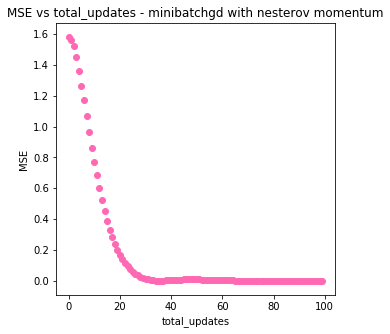

In [13]:
total_updates = int(epochs*(len(X)/batch_size))
epochs = range(total_updates)
plt.figure(figsize=(5,5))
plt.title("MSE vs total_updates - minibatchgd with nesterov momentum")
plt.xlabel("total_updates")
plt.ylabel("MSE")
plt.scatter(epochs, mse, color = 'hotpink')
plt.show()

For a detailed explanantion of exponentially weighted averages,  check https://www.coursera.org/learn/deep-neural-network/lecture/duStO/exponentially-weighted-averages
    

References:
    https://towardsdatascience.com/a-bit-beyond-gradient-descent-mini-batch-momentum-and-some-dude-named-yuri-nesterov-a3640f9e496b
    https://ruder.io/optimizing-gradient-descent/
        